# Predicting Ski Hotels Prices Using Pandas and Scikit-Learn

## Introduction
In this notebook we will look at a csv file from Kaggle and use Pandas to analyze the data and make predictions. Since the amount of data is too small for a proper statistical analysis, the purpose of this notebook is simple to show how a first approach to the data may be done.

In [1]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
df_ski_hotels = pd.read_csv('/home/alejandrito/mydata/Python/Github/Ski Hotels/ski_hotels.csv')

In [3]:
# We can take a look at the top five rows using the DataFrame's head method
df_ski_hotels.head()

,Unnamed: 0,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


Each row represents a Ski Hotel. We can now see that we have a total of 24 attributes. The blue, red and black colors represent the difficulty of the terrain in Europe from the easiest to the most difficult respectively, the other attributes do not need an explanation.

In [4]:
# In order to have a quick description of the data we use the info() method
df_ski_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              407 non-null    int64  
 1   country                 407 non-null    object 
 2   resort                  407 non-null    object 
 3   hotel                   407 non-null    object 
 4   price (£)               407 non-null    int64  
 5   distance_from_lift_(m)  407 non-null    object 
 6   altitude (m)            407 non-null    int64  
 7   totalPiste (km)         407 non-null    int64  
 8   totalLifts              407 non-null    int64  
 9   gondolas                407 non-null    int64  
 10  chairlifts              407 non-null    int64  
 11  draglifts               407 non-null    int64  
 12  blues                   407 non-null    float64
 13  reds                    407 non-null    float64
 14  blacks                  407 non-null    fl

Some atributtes are objects rather than integers, so except for "country" we will change their type to integer to make a proper use of them. We can also discard the attributes "Unnamed: 0", "hotel", "resort" and "link" since they do not provide us with any useful information to make our predictions.

In [5]:
# List of objects to convert to integers
obj_to_float = ["distance_from_lift_(m)","sleeps","decSnowLow2020(cm)",
        "decSnowHigh2020(cm)","janSnowLow2020(cm)",
        "janSnowHigh2020(cm)","janSnowHigh2020(cm)","febSnowLow2020(cm)",
        "febSnowHigh2020(cm)"]

# Set the missing values to the median
for i in obj_to_float:
    df_ski_hotels[i]=pd.to_numeric(df_ski_hotels[i], errors='coerce')
    median = df_ski_hotels[i].median()
    df_ski_hotels[i].fillna(median,inplace=True) 
    
# Drop unnecesary columns
df_ski_hotels = df_ski_hotels.drop(["Unnamed: 0","hotel","resort","link"],axis=1)  

In [6]:
# Looking for Correlations
corr_matrix = df_ski_hotels.corr()
corr_matrix["price (£)"].sort_values(ascending=False)

price (£)                 1.000000
gondolas                  0.315569
blues                     0.290029
totalRuns                 0.252457
blacks                    0.218314
chairlifts                0.214678
janSnowLow2020(cm)        0.192106
totalLifts                0.186678
totalPiste (km)           0.160318
reds                      0.159755
febSnowLow2020(cm)        0.152931
altitude (m)              0.116842
decSnowLow2020(cm)        0.078921
draglifts                 0.066747
sleeps                    0.038001
febSnowHigh2020(cm)       0.018289
janSnowHigh2020(cm)      -0.017138
decSnowHigh2020(cm)      -0.031368
distance_from_lift_(m)   -0.165355
Name: price (£), dtype: float64

We can also use Pandas' scatter_matrix function to check for correlations. Since we have 19 numerical attributes now and the function plots everyone against each other, we will choose just the first 4 attributes from the list above.

array([[<AxesSubplot:xlabel='price (£)', ylabel='price (£)'>,
        <AxesSubplot:xlabel='gondolas', ylabel='price (£)'>,
        <AxesSubplot:xlabel='blues', ylabel='price (£)'>,
        <AxesSubplot:xlabel='totalRuns', ylabel='price (£)'>,
        <AxesSubplot:xlabel='blacks', ylabel='price (£)'>],
       [<AxesSubplot:xlabel='price (£)', ylabel='gondolas'>,
        <AxesSubplot:xlabel='gondolas', ylabel='gondolas'>,
        <AxesSubplot:xlabel='blues', ylabel='gondolas'>,
        <AxesSubplot:xlabel='totalRuns', ylabel='gondolas'>,
        <AxesSubplot:xlabel='blacks', ylabel='gondolas'>],
       [<AxesSubplot:xlabel='price (£)', ylabel='blues'>,
        <AxesSubplot:xlabel='gondolas', ylabel='blues'>,
        <AxesSubplot:xlabel='blues', ylabel='blues'>,
        <AxesSubplot:xlabel='totalRuns', ylabel='blues'>,
        <AxesSubplot:xlabel='blacks', ylabel='blues'>],
       [<AxesSubplot:xlabel='price (£)', ylabel='totalRuns'>,
        <AxesSubplot:xlabel='gondolas', ylabel='totalR

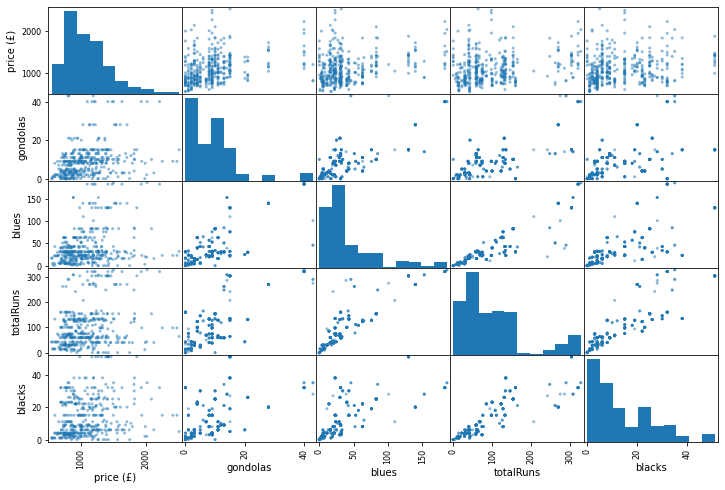

In [7]:
attributes = ["price (£)","gondolas","blues","totalRuns","blacks"]
scatter_matrix(df_ski_hotels[attributes],figsize=(12,8))

In [8]:
# Create a scatter matrix to visualize correlations
df_ski_hotels[attributes].corr().style.background_gradient(cmap = "RdGy")

,price (£),gondolas,blues,totalRuns,blacks
price (£),1.000000,0.315569,0.290029,0.252457,0.218314
gondolas,0.315569,1.000000,0.728045,0.711888,0.462964
blues,0.290029,0.728045,1.000000,0.897557,0.660272
totalRuns,0.252457,0.711888,0.897557,1.000000,0.840031
blacks,0.218314,0.462964,0.660272,0.840031,1.000000


<AxesSubplot:xlabel='country', ylabel='price (£)'>

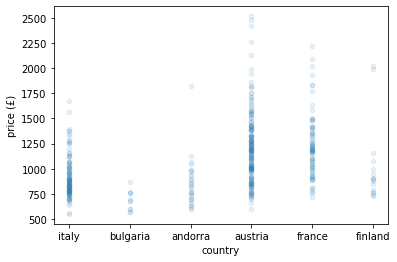

In [9]:
df_ski_hotels.plot(kind="scatter",x="country",y="price (£)",alpha=0.1)

In [10]:
# Define X and y
X = df_ski_hotels.drop(columns=['price (£)','country'])
y = df_ski_hotels['price (£)']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("Mean Squared Error:", mse)
print("R\u00B2 Score:", r2)

Mean Squared Error: 92898.46685439863
R² Score: 0.24973732383410718


# Conclusion
From this analysis we can conclude that there isn't a strong correlation between the price of the hotels and any of the attributes listed in this dataset. 